In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

from scipy.stats import multivariate_normal, norm

# Problem 1: K-means

### Generate 500 observations from a mixture of three Guassians with mixing weights $\pi$ = [0.2, 0.5, 0.3], and means and covariances as:

### $\mu_1 = \begin{bmatrix}
  0\\ 
  0
\end{bmatrix}$, $\Sigma_1 = \begin{bmatrix}
  1 & 0\\ 
  0 & 1
\end{bmatrix}$ 

###  $\mu_2 = \begin{bmatrix}
  3\\ 
  0
\end{bmatrix}$, $\Sigma_2 = \begin{bmatrix}
  1 & 0\\ 
  0 & 1
\end{bmatrix}$ 

### $\mu_3 = \begin{bmatrix}
  0\\ 
  3
\end{bmatrix}$, $\Sigma_3 = \begin{bmatrix}
  1 & 0\\ 
  0 & 1
\end{bmatrix}$ 

In [61]:
# data generating process
cov = np.matrix([[1,0],[0,1]])
mean1 = np.array([0,0])
mean2 = np.array([3,0])
mean3 = np.array([0,3])

gauss1 = np.random.multivariate_normal(mean1, cov, 500)
gauss2 = np.random.multivariate_normal(mean2, cov, 500)
gauss3 = np.random.multivariate_normal(mean3, cov, 500)

In [63]:
choice = np.random.choice(range(3), size = 500, p = [0.2, 0.5, 0.3])

In [66]:
data = np.concatenate((gauss1[choice == 0, :],
                      gauss2[choice == 1, :],
                      gauss3[choice == 2, :]))

a) For K = 2,3,4,5, plot the value of the K-means objective function per iteration for 20 iterations

In [69]:
# set up
n_iter = 20
K = [2,3,4,5]

In [70]:
# update cluster assignment
def update_cluster(X, C):
    C_extended = C[:, np.newaxis]
    
    # euclidean distance
    distances = np.sqrt(((X - C_extended)**2).sum(axis =2))
    
    # return new assignment
    return np.argmin(distances, axis = 0)

In [71]:
# update centroid
def update_centroid(X, c, C):
    
    new_cluster = c
    
    # for each assignment, calculate the new centroid
    new_centroid = np.array([X[new_cluster == k].mean(axis = 0) for k in range(C.shape[0])])
    
    return new_centroid

In [72]:
# calculate objective fucntion
def objective_function(X, c, mu):
    
#     c = update_cluster(X, C)
#     mu = update_centroid(X, C)
    
    result = 0
    
    idx = 0
    for x in X:
#         print(c[idx])
#         print(mu[c[idx]])
        result += (np.sqrt(((x - mu[c[idx]])**2).sum()))
        idx += 1
        
    
    return result

In [73]:
def kmeans_pipeline(X, C):
    # randomly initialize centroid
    c = update_cluster(X, C)
    mu = update_centroid(X, c, C)
    L = objective_function(X, c, mu)
    
    return L, mu, c

In [78]:
result = []
c_result = []
i = 0
for k in K:
    temp = []
    # randomly initialize centroid
    centroids = np.random.rand(k, np.shape(data)[1])
    while(i < n_iter):
        L, mu, c = kmeans_pipeline(data, centroids)
        centroids = mu
        temp.append(L)
        i += 1
    
    result.append(temp)
    c_result.append(c)
    i = 0
    

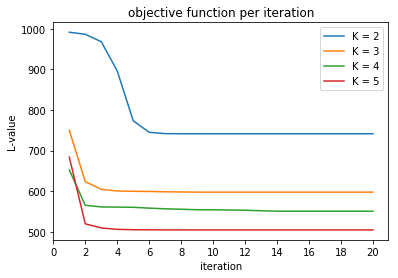

In [79]:
fig, ax = plt.subplots();
iteration = range(1,21,1)
ax.plot(iteration, result[0], label = 'K = 2');
ax.plot(iteration, result[1], label = 'K = 3');
ax.plot(iteration, result[2], label = 'K = 4');
ax.plot(iteration, result[3], label = 'K = 5');
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]);
ax.set_xlabel('iteration');
ax.set_ylabel('L-value');
ax.set_title('objective function per iteration');
ax.legend();
fig.savefig('1a')

b) For K = 3,5 plot the 500 data points and indicate the cluster of each for the final iteration by marking it with a color or a symbol

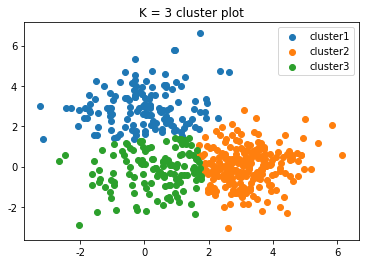

In [80]:
fig, ax = plt.subplots();

idx_list = []
for k in range(0, 3, 1):
    idx_list.append(np.where(c_result[1] == k))

ax.scatter(data[idx_list[0], 0], data[idx_list[0], 1], label = 'cluster1');
ax.scatter(data[idx_list[1], 0], data[idx_list[1], 1], label = 'cluster2');
ax.scatter(data[idx_list[2], 0], data[idx_list[2], 1], label = 'cluster3');
ax.set_title('K = 3 cluster plot');

ax.legend();
fig.savefig('1b1')

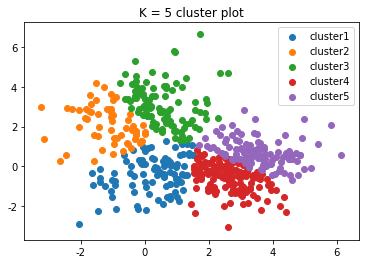

In [81]:
fig, ax = plt.subplots();

idx_list = []
for k in range(0, 5, 1):
    idx_list.append(np.where(c_result[3] == k))

ax.scatter(data[idx_list[0], 0], data[idx_list[0], 1], label = 'cluster1');
ax.scatter(data[idx_list[1], 0], data[idx_list[1], 1], label = 'cluster2');
ax.scatter(data[idx_list[2], 0], data[idx_list[2], 1], label = 'cluster3');
ax.scatter(data[idx_list[3], 0], data[idx_list[3], 1], label = 'cluster4');
ax.scatter(data[idx_list[4], 0], data[idx_list[4], 1], label = 'cluster5');
ax.set_title('K = 5 cluster plot');

ax.legend();
fig.savefig('1b2')

# Problem 2: Bayes classifier revisited

## 1. Initialize all covaraince metrices to the empirical covaraince of the data being modeled.

## 2. Randomly initialize the means by sampling from a single multivariate Gaussian where the parameters are the mean and covaraince of the data being modeled.

## 3. Initialize the mixing weights to be uniform.

In [2]:
X_train = pd.read_csv('./hw3-data/Prob2_Xtrain.csv', header = None)
X_test = pd.read_csv('./hw3-data/Prob2_Xtest.csv', header = None)
y_train = pd.read_csv('./hw3-data/Prob2_ytrain.csv', header = None)
y_test = pd.read_csv('./hw3-data/Prob2_ytest.csv', header = None)

In [16]:
X1, X2 = X_train[y_train[0] == 0], X_train[y_train[0] == 1]

In [17]:
X1_array, X2_array = X1.to_numpy(), X2.to_numpy()

a) Implement the EM algorithm for the GMM described in class. For each class separately, plot the log marginal objective function for a 3-Gaussian mixture model over 10 different runs and for iterations 5 to 30. There should be two plots, each with 10 curves.

In [430]:
def initializing(X, c):
    
    # initialize covaraince
    empirical_cov = np.cov(X.T)
    empirical_mean = np.mean(X, axis = 0)
    
    #print(empirical_cov.shape)
    #print(empirical_mean.shape)
    
    if c != 1:
        # initialize the means from a single multivariate Gaussian
        # three GMM with 10 classes
        #mu = np.random.multivariate_normal(empirical_mean, empirical_cov, X1.shape[0])
        mu = multivariate_normal(empirical_mean, empirical_cov).rvs(c)

        sigma = np.array([empirical_cov for _ in range(c)])

        # initialize the mixing weights
        pi = np.array([1/c]*c)
    else:
        mu = multivariate_normal(empirical_mean, empirical_cov).rvs(c)

        sigma = np.array([empirical_cov for _ in range(c)])

        # initialize the mixing weights
        pi = np.array([1/c]*c)
        mu = np.array([mu])
    
    return pi, mu, sigma
    

In [467]:
def e_step(X, pi, mu, sigma):
    # E-step of the algorithm
    
    # Parameters:
    # X: N x d data points
    # pi: C, mixture weights
    # mu: C x d, mixture means
    # sigma: C x d x d, mixture covariance
    
    nom = np.zeros((X.shape[0], pi.shape[0]))
    # nominator
    for c in range(pi.shape[0]):
        nom[:, c] = pi[c] * multivariate_normal.pdf(X, mu[c,:], sigma[c], allow_singular = True)
            #print(nom[:, c])
        #print(nom)
        # denominator
        denom = np.sum(nom, axis = 1)[:, np.newaxis]
        e_result = nom/denom
    
    return e_result


In [373]:
def m_step(X, sigma, phi):
    # M-step of the algorithm
    
    # X: N x d, data
    # phi: N x C, posterior distribution

    pi = np.mean(phi, axis = 0)
    mu = np.dot(phi.T, X)/np.sum(phi, axis = 0)[:, np.newaxis]
    
    for c in range(pi.shape[0]):
        x = np.matrix(X - mu[c, :])
        phi_diag = np.matrix(np.diag(phi[:, c]))
        
        sigma_new = x.T * phi_diag * x
        denom = np.sum(phi, axis = 0)[:, np.newaxis][c]
        sigma[c,:,:] = sigma_new/denom
    
    return pi, mu, sigma
        
        

In [102]:
def loss_function(X, pi, mu, sigma, phi):
    loss = np.zeros((X.shape[0], phi.shape[1]))
    
    for c in range(pi.shape[0]):
        dist = multivariate_normal(mu[c], sigma[c], allow_singular = True)
        loss[:, c] = phi[:, c]*(np.log(pi[c]) + dist.logpdf(X))
        #print(loss[:, c].shape)
    #print(loss.shape)    
    loss = np.sum(loss)
    
    return loss

In [246]:
def algorithm(X, mixture, run):
    run_result = []
    param_list = []
    score_list = []

    c = mixture
    num_run = run
    num_iter = 30

    for i in range(num_run):
        #print(i)
        pi, mu, sigma = initializing(X, c)
        iter_result = []

        for j in range(num_iter):
            #print(j)
            phi = e_step(X, pi, mu, sigma) # e-step
            
            if np.isnan(phi).sum() != 0:
                break
            else:
                pi, mu, sigma = m_step(X, sigma, phi) # m-step
                loss = loss_function(X, pi, mu, sigma, phi) # loss function

                if j > 3 and j < 30:
                    iter_result.append(loss)
                    
        param_list.append([pi, mu, sigma, phi])
        score_list.append(loss)
        run_result.append(iter_result)
        
    return run_result, param_list, score_list

In [436]:
class1_result, param1, score1 = algorithm(X1_array, 3, 10)
class2_result, param2, score2 = algorithm(X2_array, 3, 10)

/Users/bowenzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


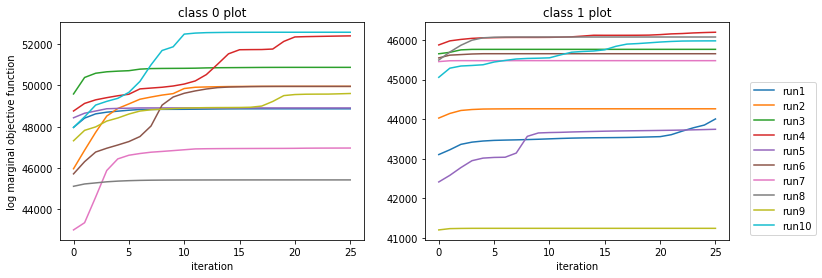

In [437]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax1, ax2 = ax.ravel()

for i in range(len(class1_result)):
    ax1.plot(range(len(class1_result[0])), class1_result[i], label = 'run{}'.format(i+1))
    ax2.plot(range(len(class2_result[0])), class2_result[i], label = 'run{}'.format(i+1))

ax1.set_title('class 0 plot');
ax2.set_title('class 1 plot');
ax1.set_xlabel('iteration');
ax2.set_xlabel('iteration');
ax1.set_ylabel('log marginal objective function');

ax2.legend(loc = 'lower right', bbox_to_anchor = (1.3, 0));

b) Using the best run for each class after 30 iterations, predict the testing data using a Bayes classifier and show the result in a 2 x 2 confusion matrix, along with the accuracy percentage. Repeat this process for a 1-, 2-, 3-, and 4-Gaussian mixture model. Show all results nearby each other, and don't repeat Part (a) for these other cases. Note that a 1-Gaussian GMM doesn't require an algorithm, although your implementation will likely still work.

In [462]:
score1

[48864.1073521673,
 49949.26527344855,
 50868.653251903,
 52390.42494117927,
 48907.788710900655,
 49948.606780178,
 46967.57517463421,
 45426.6718642803,
 49604.545478575405,
 52566.36980461823]

In [438]:
# for class 0
pi1 = param1[9][0]
mu1 = param1[9][1]
sigma1 = param1[9][2]
phi1 = param1[9][3]

In [439]:
# for class 1
pi2 = param2[3][0]
mu2 = param2[3][1]
sigma2 = param2[3][2]
phi2 = param2[3][3]

In [440]:
pi_list = [pi1, pi2]
mu_list = [mu1, mu2]
sigma_list = [sigma1, sigma2]

In [136]:
def get_prior(y):
    result = {}
    cnt = collections.Counter(np.squeeze(np.asarray(y)))
    total = y.shape[0]
    
    for i in np.unique(y):
        result[i] = cnt[i]/total
    
    return result

In [402]:
def predict(X, y, pi_list, mu_list, sigma_list):
    
    prior = get_prior(y)
    post = np.ones(np.unique(y).shape[0])
    
    for i in np.unique(y):
        
        pi = pi_list[i]
        mu = mu_list[i]
        sigma = sigma_list[i]
        loss = np.zeros((X.shape[0], pi.shape[0]))
        phi = e_step(X, pi, mu, sigma)
        
        for c in range(pi.shape[0]):
            dist = multivariate_normal(mu[c], sigma[c], allow_singular = True)
            loss[:, c] = phi[:, c]*((pi[c]) * dist.pdf(X))
        
        likelihood = np.log(np.sum(loss))
        post[i] = np.log(prior[i]) + likelihood
    
    #print(post)
    prediction = post.argmax()
    
    return prediction

In [186]:
X_test_array = X_test.to_numpy()

In [441]:
prediction = []

TP = 0
FN = 0
FP = 0
TN = 0

for i in range(X_test.shape[0]):
    label = predict(X_test_array[i], y_train, pi_list, mu_list, sigma_list)
    prediction.append(label)
    
    target = y_test[0][i]
    
    if target == 1 and label == 1:
        TP += 1
    if target == 0 and label == 1:
        FP += 1
    if target == 1 and label == 0:
        FN += 1
    if target == 0 and label == 0:
        TN += 1

/Users/bowenzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [442]:
rst = pd.DataFrame(index = ['pred_1', 'pred_0'], columns = ['y_1', 'y_0'])


In [443]:
rst.iloc[0,0] = TP
rst.iloc[0,1] = FP
rst.iloc[1,0] = FN
rst.iloc[1,1] = TN

In [449]:
def get_param(param1, param2, index1, index2):
    pi1 = param1[index1][0]
    mu1 = param1[index1][1]
    sigma1 = param1[index1][2]
    phi1 = param1[index1][3]
    
    pi2 = param2[index2][0]
    mu2 = param2[index2][1]
    sigma2 = param2[index2][2]
    phi2 = param2[index2][3]
    
    pi_list = [pi1, pi2]
    mu_list = [mu1, mu2]
    sigma_list = [sigma1, sigma2]
    
    return pi_list, mu_list, sigma_list

In [463]:
def gmm_pipeline(num_mix, num_run):
    class1_result, param1, score1 = algorithm(X1_array, num_mix, num_run)
    class2_result, param2, score2 = algorithm(X2_array, num_mix, num_run)
    
    best1 = np.argmax(score1)
    best2 = np.argmax(score2)
    pi_list, mu_list, sigma_list = get_param(param1, param2, best1, best2)
    
    prediction = []

    TP = 0
    FN = 0
    FP = 0
    TN = 0

    for i in range(X_test.shape[0]):
        label = predict(X_test_array[i], y_train, pi_list, mu_list, sigma_list)
        prediction.append(label)

        target = y_test[0][i]

        if target == 1 and label == 1:
            TP += 1
        if target == 0 and label == 1:
            FP += 1
        if target == 1 and label == 0:
            FN += 1
        if target == 0 and label == 0:
            TN += 1

    rst = pd.DataFrame(index = ['pred_1', 'pred_0'], columns = ['y_1', 'y_0'])
    rst.iloc[0,0] = TP
    rst.iloc[0,1] = FP
    rst.iloc[1,0] = FN
    rst.iloc[1,1] = TN
    
    acc = (TP + TN)/(TP + FP + FN + TN)
    
    return rst, acc

# result of 3-GMM

In [468]:
rst3, acc3 = gmm_pipeline(3, 10)

/Users/bowenzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [469]:
rst3

,y_1,y_0
pred_1,170,96
pred_0,12,182


In [470]:
acc3

0.7652173913043478

# result of 2-GMM

In [477]:
rst2, acc2 = gmm_pipeline(2, 10)

/Users/bowenzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [478]:
rst2

,y_1,y_0
pred_1,172,114
pred_0,10,164


In [479]:
acc2

0.7304347826086957

# result of 4-GMM

In [471]:
rst4, acc4 = gmm_pipeline(4, 10)

/Users/bowenzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [472]:
rst4

,y_1,y_0
pred_1,161,77
pred_0,21,201


In [473]:
acc4

0.7869565217391304

# result of 1-GMM

In [483]:
rst1, acc1 = gmm_pipeline(1, 10)

/Users/bowenzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [484]:
rst1

,y_1,y_0
pred_1,173,156
pred_0,9,122


In [485]:
acc1

0.6413043478260869

# Problem 3: Matrix factorization

Implement the MAP inference algorithm for the matrix completion problem. For users $u \in R^d$ and movies $v \in R^d$, $u_i \sim N(0, \lambda^{-1} I)$, i = 1, ..., $N_1$, and $v_j \sim N(0, \lambda^{-1}I)$, j = 1,..., $N_2$.

We are given an $N_1 x N_2$ matrix M with missing values. Given the set $\Omega = \{(i,j): M_{ij}$ is measured$\}$, for each (i,j) $\in \Omega$ we model $M_{ij} \sim N(u^T_i v_j, \sigma^2$).

Set $\sigma^2 = 0.25, d = 10, \lambda = 1$. Train the model on train set for 100 iterations.

In [2]:
ratings_train = pd.read_csv('./hw3-data/Prob3_ratings.csv', header = None)
ratings_test = pd.read_csv('./hw3-data/Prob3_ratings_test.csv', header = None)

a) Run code 10 times. For each run, initialize $u_i$ and $v_j$ vectors as N(0, I) random vectors. On a single plot, show the log joint likelihood for iterations 2 to 100 for each run. In a table, show in each row the final value of the training objective function next to the RMSE on the testing set. Sort these rows according to decreasing value of the objective function.

In [3]:
ratings_train.columns = ['user_id', 'movie_id', 'rating']
ratings_test.columns = ['user_id', 'movie_id', 'rating']

In [4]:
ratings_train.shape

(95000, 3)

In [5]:
def construct_train(df):
    n1 = df.user_id.max()
    n2 = df.movie_id.max()
    
    train = np.repeat(np.nan, n1*n2).reshape(n1, n2)
    
    for i in range(df.shape[0]):
        train[int(df.iloc[i][0] - 1), int(df.iloc[i][1] - 1)] = float(df.iloc[i][2])
    
    return train

In [6]:
def construct_test(df):
    n1 = train.shape[0]
    n2 = train.shape[1]
    
    test = np.repeat(np.nan, n1*n2).reshape(n1, n2)
    
    for i in range(df.shape[0]):
        test[int(df.iloc[i][0] - 1), int(df.iloc[i][1] - 1)] = float(df.iloc[i][2])
    
    return test

In [7]:
train = construct_train(ratings_train)

In [8]:
test = construct_test(ratings_test)

In [9]:
def update_user(matrix, U, V):
    num_users = matrix.shape[0]
    
    lamda = 1
    variance = 0.25
    d = 10
    
    first_term = lamda*variance*np.identity(d)
    
    # for each user location
    for i in range(num_users):
        #print(matrix[i, :])
        observed = ~np.isnan(matrix[i, :])
        #print(observed)
        Vi = V[:, observed]
        Mi = matrix[i, observed]
        
        U[i,:] = np.linalg.inv(first_term + np.dot(Vi, Vi.T)).dot(Vi.dot(Mi.T))
        
    
    return U
    

In [10]:
def update_object(matrix, U, V):
    num_object = matrix.shape[1]
    
    lamda = 1
    variance = 0.25
    d = 10
    
    first_term = lamda*variance*np.identity(d)
    
    # for each object location
    for j in range(num_object):
        observed = ~np.isnan(matrix[:, j])
        #print(observed)
        Uj = U[observed, :]
        Mj = matrix[observed, j]
        
        V[:,j] = np.linalg.inv(first_term + np.dot(Uj.T, Uj)).dot(Uj.T.dot(Mj.T))
        
    
    return V
    

In [11]:
def error(matrix, U, V):
    lamda = 1
    variance = 0.25
    d = 10
    
    observed = ~np.isnan(matrix)
    predicted = np.dot(U, V)
    
    actual = matrix[observed]
    score = ((actual - predicted[observed])**2).sum()
    
    #if matrix is test:
       # print(predicted[observed])
    
    return score

In [22]:
def objective(matrix, U, V):
    lamda = 1
    variance = 0.25
    d = 10
    
    # calculate first term
    sqr_error = error(matrix, U, V)
    #print(sqr_error)
    first_term = sqr_error/(2*variance)
    
    # calculate second term
    second_term = (U**2).sum()*(lamda/2)
    #second_term = np.sum(np.linalg.norm(U[i,:]) for i in range(U.shape[0]))*(lamda/2)
    
    # calculate third term
    third_term = (V**2).sum()*(lamda/2)
    #third_term = np.sum(np.linalg.norm(V[:, j]) for j in range(V.shape[0])).sum()*(lamda/2)
    
    L = first_term + second_term + third_term
    #print(L)
    
    return (-L)

In [23]:
def PMF(matrix):
    lamda = 1
    variance = 0.25
    d = 10 # rank
    
    n1 = matrix.shape[0] # number of users
    n2 = matrix.shape[1] # number of items
    
    # initialize random U, V
    U = np.random.multivariate_normal(np.repeat(0, d), np.identity(d)/lamda, n1)
    V = np.random.multivariate_normal(np.repeat(0,d), np.identity(d)/lamda, n2).T
    
    objective_ls = []
    
    max_iter = 100 # number of iterations
    
    for r in range(max_iter):
        
        new_U = update_user(matrix, U, V)
        
        new_V = update_object(matrix, U, V)
    
        if r > 1:
            objective_ls.append(objective(matrix, new_U, new_V))
    
    return objective_ls, new_U, new_V

In [24]:
result = []
U_ls = []
V_ls = []
table = pd.DataFrame(index = range(10),
                    columns = ['rmse','objective'])

for i in range(10):
    L, U, V = PMF(train)
    result.append(L)
    U_ls.append(U)
    V_ls.append(V)
    table.iloc[i,0] = np.sqrt(error(test, U, V)/ratings_test.shape[0])
    table.iloc[i,1] = L[-1]

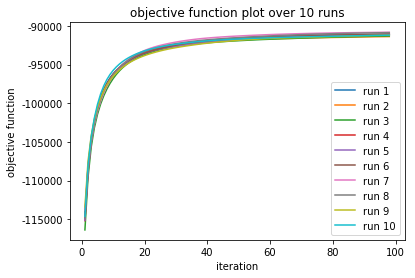

In [25]:
fig, ax = plt.subplots()
iteration = range(1, 99, 1)
for i in range(len(result)):
    ax.plot(iteration, result[i], label = 'run {}'.format(i+1))

ax.set_xlabel('iteration');
ax.set_ylabel('objective function');
ax.set_title('objective function plot over 10 runs');
ax.legend();


In [26]:
table.sort_values('objective', ascending = False)

,rmse,objective
6,1.11617,-90817.5
7,1.12033,-90867.1
5,1.0863,-91062.4
3,1.09545,-91070.6
4,1.10945,-91086.9
0,1.14041,-91112.7
8,1.11961,-91196.3
9,1.09307,-91197.7
2,1.1015,-91298.5
1,1.13821,-91376.9


b) For the run with the highest objective value, pick the movies "Star Wars" "My Fair Lady" and "Goodfellas" and for each movie find the 10 closest movies according to Euclidean distance  using respective location $v_j$. List the query movie, the ten nearest movies and their distances. A mapping from index to movie is provided with the data.

In [471]:
f = open('./hw3-data/Prob3_movies.txt', 'r')

In [472]:
movie_names = []
for line in f:
    line = line.strip()
    line = line.split('(')
    movie_names.append(line[0])

In [449]:
movies = pd.DataFrame(index = range(1682),
                     columns = ['movie_id', 'movie_name'])

In [451]:
movies.movie_id = range(1, 1683, 1)

In [474]:
movies.movie_name = movie_names

In [577]:
movies[movies.movie_name == 'GoodFellas ']

,movie_id,movie_name
181,182,GoodFellas


In [578]:
movies[movies.movie_name == 'My Fair Lady ']

,movie_id,movie_name
484,485,My Fair Lady


In [579]:
movies[movies.movie_name == 'Star Wars ']

,movie_id,movie_name
49,50,Star Wars


In [570]:
def get_movies(V, target):
    
    target_vector = V[:, target]
    
    distance = np.sqrt(((V.T - target_vector)**2).sum(axis = 1))
    
    df = pd.DataFrame({'movie_id': range(1, 1683, 1),
                      'distance': distance})
    
    df10 = df.sort_values('distance').iloc[0:11,:]
    
    df10 = df10.merge(movies, on = 'movie_id', how = 'left')
    df10 = df10[['movie_id', 'movie_name', 'distance']]
    
    return df10

In [565]:
best_V = V_ls[1]

In [580]:
# top10 for GoodFellas

movie1 = get_movies(best_V, 181)
movie2 = get_movies(best_V, 484)
movie3 = get_movies(best_V, 49)

In [581]:
movie1

,movie_id,movie_name,distance
0,182,GoodFellas,0.000000
1,180,Apocalypse Now,0.718481
2,187,"Godfather: Part II, The",0.787832
3,177,"Good, The Bad and The Ugly, The",0.810482
4,523,Cool Hand Luke,0.836712
5,518,Miller's Crossing,0.837655
6,469,Short Cuts,0.840653
7,188,Full Metal Jacket,0.853117
8,504,Bonnie and Clyde,0.909487
9,494,His Girl Friday,0.927509


In [582]:
movie2

,movie_id,movie_name,distance
0,485,My Fair Lady,0.000000
1,419,Mary Poppins,0.432294
2,486,Sabrina,0.587397
3,699,Little Women,0.686037
4,8,Babe,0.743942
5,418,Cinderella,0.761354
6,465,"Jungle Book, The",0.766173
7,602,"American in Paris, An",0.771249
8,705,Singin' in the Rain,0.781714
9,99,Snow White and the Seven Dwarfs,0.795669


In [583]:
movie3

,movie_id,movie_name,distance
0,50,Star Wars,0.000000
1,172,"Empire Strikes Back, The",0.322864
2,174,Raiders of the Lost Ark,0.501493
3,181,Return of the Jedi,0.660750
4,210,Indiana Jones and the Last Crusade,0.862648
5,12,"Usual Suspects, The",0.953355
6,204,Back to the Future,1.005424
7,613,My Man Godfrey,1.028646
8,87,Searching for Bobby Fischer,1.059556
9,166,Manon of the Spring,1.070490
